# CNN and Computer Vision

## Part 1 - CNN

### Importing data

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import cv2
import PIL

from sklearn.decomposition import PCA, IncrementalPCA

import keras
from keras.layers import Dense,Dropout, BatchNormalization, Activation, Flatten, Input
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical

from keras.preprocessing import image

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pr

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
train_folder='drive/My Drive/Projects/Computer Vision/train'

### Analysing and Visualizing data

In [ ]:
data_dir_train = pathlib.Path(train_folder)

folder_train = list(data_dir_train.glob('*'))
images_train = list(data_dir_train.glob('*/*.png')) #list of all images (full path)
print('Folder Structure:')
for f in folder_train:
    print(f)
print('\nNumber of images: ', len(images_train))

Folder Structure:
drive/My Drive/Projects/Computer Vision/train/Predict.png
drive/My Drive/Projects/Computer Vision/train/Maize
drive/My Drive/Projects/Computer Vision/train/Scentless Mayweed
drive/My Drive/Projects/Computer Vision/train/Small-flowered Cranesbill
drive/My Drive/Projects/Computer Vision/train/Common wheat
drive/My Drive/Projects/Computer Vision/train/Cleavers
drive/My Drive/Projects/Computer Vision/train/Common Chickweed
drive/My Drive/Projects/Computer Vision/train/Shepherds Purse
drive/My Drive/Projects/Computer Vision/train/Sugar beet
drive/My Drive/Projects/Computer Vision/train/Loose Silky-bent
drive/My Drive/Projects/Computer Vision/train/Fat Hen
drive/My Drive/Projects/Computer Vision/train/Charlock
drive/My Drive/Projects/Computer Vision/train/Black-grass

Number of images:  4781


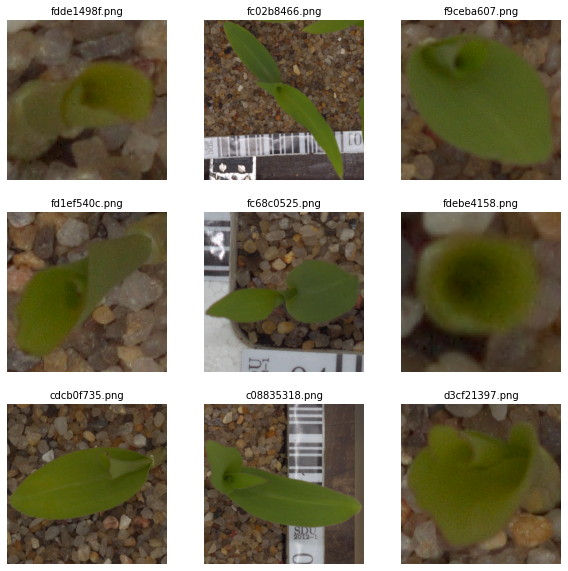

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(str(images_train[i]).split('/')[-1], fontsize=10) #get the file name and display as title
    plt.imshow(PIL.Image.open(images_train[i]))
    ax = plt.axis("off")

In [ ]:
image_size = 256
batch_size = 32

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20, # You can uncomment these parameters to make you generator rotate & flip the images to put the train model in stricter conditions.
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [ ]:
train_gen = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/train',
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=1
                                                )

Found 3828 images belonging to 12 classes.


In [ ]:
val_gen = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/train',
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   class_mode='categorical',
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   seed=1
                                                )

Found 953 images belonging to 12 classes.


In [ ]:
classes = train_gen.class_indices
print(classes)
class_names = []
for c in classes:
    class_names.append(c)
print('The name of the classes are: ', class_names)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
The name of the classes are:  ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


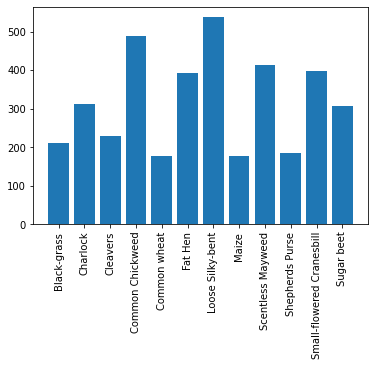

In [ ]:
unique, counts = np.unique(train_gen.classes, return_counts=True)
dict1 = dict(zip(train_gen.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)

### Model Building

We can observe that there are more images in Loose Silky-bent and Common Chickweed folders compared to others. Less images of Maize and Common wheat are stored.

In [ ]:
model_cnn = tf.keras.models.Sequential()

# Input layer
# Can be omitted, you can specify the input_shape in other layers
model_cnn.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,)))

# Here we add a 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model_cnn.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model_cnn.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model_cnn.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
model_cnn.add(tf.keras.layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
model_cnn.add(tf.keras.layers.Dropout(0.2))
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))

# Normalization layer
model_cnn.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
model_cnn.add(tf.keras.layers.Dense(12, activation='softmax')) # = 12 predicted classes

In [ ]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [ ]:
# You can save the best model to the checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint('cnn_classifier.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [ ]:
history = model_cnn.fit(train_gen,
          epochs=15, 
          steps_per_epoch= 3828//batch_size,  # Number of train images // batch_size
          validation_data=val_gen,
          validation_steps = 953//batch_size, # Number of val images // batch_size
          callbacks = [checkpoint],
          verbose = 1
)

Epoch 1/15
119/119 [==============================] - 821s 7s/step - loss: 1.9622 - accuracy: 0.3351 - val_loss: 3.6487 - val_accuracy: 0.1401

Epoch 00001: val_accuracy improved from -inf to 0.14009, saving model to cnn_classifier.h5
Epoch 2/15
119/119 [==============================] - 818s 7s/step - loss: 1.2500 - accuracy: 0.5682 - val_loss: 4.3478 - val_accuracy: 0.1412

Epoch 00002: val_accuracy improved from 0.14009 to 0.14116, saving model to cnn_classifier.h5
Epoch 3/15
119/119 [==============================] - 811s 7s/step - loss: 0.9433 - accuracy: 0.6862 - val_loss: 3.7641 - val_accuracy: 0.1487

Epoch 00003: val_accuracy improved from 0.14116 to 0.14871, saving model to cnn_classifier.h5
Epoch 4/15
119/119 [==============================] - 821s 7s/step - loss: 0.7553 - accuracy: 0.7521 - val_loss: 5.1633 - val_accuracy: 0.2101

Epoch 00004: val_accuracy improved from 0.14871 to 0.21013, saving model to cnn_classifier.h5
Epoch 5/15
119/119 [==============================]

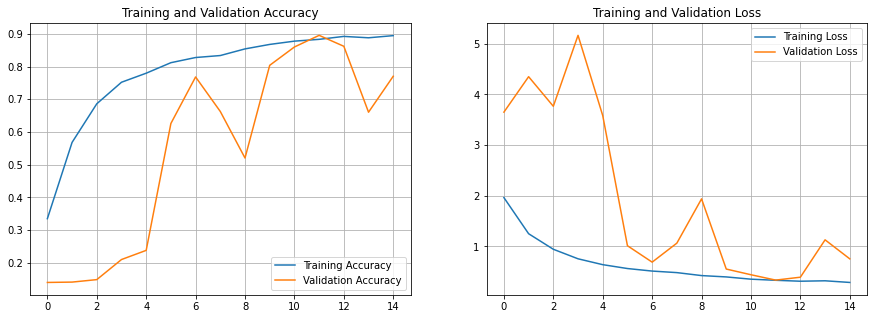

In [ ]:
epochs = 15

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

### Predicting the given image using CNN.

In [ ]:
pred = cv2.imread(train_folder+'/Predict.png')
# ax = plt.imshow(pred)

In [ ]:
pred = cv2.resize(pred, (256,256))
pred_batch = np.expand_dims(pred, axis=0)
conv_pred = model_cnn.predict(pred_batch)
conv_pred.shape

(1, 12)

In [ ]:
score = tf.nn.softmax(conv_pred[0])

(85, 85, 1)
(85, 85)


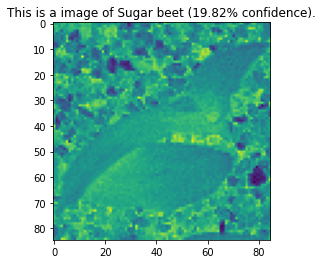

In [ ]:
simple_model = tf.keras.models.Sequential()
simple_model.add(tf.keras.layers.Conv2D(1,3,3,input_shape=pred.shape)) # 3x3 kernel

pred_batch = np.expand_dims(pred, axis=0)
conv_pred2 = simple_model.predict(pred_batch)
conv_pred2 = np.squeeze(conv_pred2, axis=0)
    
print(conv_pred2.shape)
conv_pred2 = conv_pred2.reshape(conv_pred2.shape[:2])
print(conv_pred2.shape)

ax = plt.imshow(pred)
ax = plt.title("This is a image of {} ({:.2f}% confidence).".format(class_names[np.argmax(score)], 100 * np.max(score)), fontsize=12)

The given image belongs to Sugar beet category which is classified using CNN model.

## Part 2

### Comparing all 3 models

In [ ]:
data = {'Accuracy': [17.76, 25.43, 89.54],
        'Epochs': ['Na', '20', '15']}

pd.DataFrame(data,
             index = ['Supervised Learning', 'Neural Network', 'Convolutional Neural Network'])

,Accuracy,Epochs
Supervised Learning,17.76,Na
Neural Network,25.43,20
Convolutional Neural Network,89.54,15


After trying different approaches on the same data we can observe that CNN is better compared to Neural Network and Supervised Learning methods.
- The difference in accuracy is huge when comparing CNN with other models.
- Number of epochs is also less in CNN.
- Time taken is slightly more in CNN while it's considerable as accuracy makes a difference.

Advantages of CNN over other models used
- Using ANN, image classification problems become difficult because 2 dimensional images need to be converted to 1 dimensional vectors. This increases the number of trainable parameters exponentially. Increasing trainable parameters takes storage and processing capability. In other words, it would be expensive. 
- Though we used PCA and SVM, these models have limitations in speed and size during both training and testing phases.
- The main advantage of CNN compared to its predecessors is that it automatically detects the important features without any human supervision. This is why CNN would be an ideal solution to computer vision and image classification problems.

